### Womens Clothing E-Commerce Reviews

##### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data file
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)

###### What are the age of the reviewers?
I plot the distribution of age with kind='hist' and 'box' and also the density estimate of the age. I can see that the major of the reviews has around 30-50 years and the median age is 41.

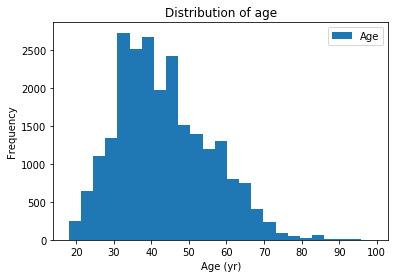

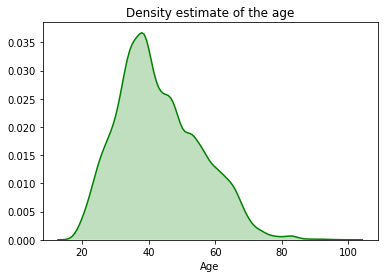

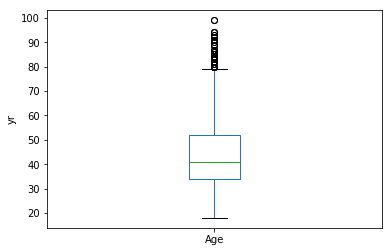

In [3]:
# Histogram to see the distribution of the age of the reviewers
rev.plot(y='Age', kind='hist', bins=25)
plt.xlabel('Age (yr)')
plt.title('Distribution of age')
plt.show()

# Plot a filled kernel density estimate of the distribution of age
sns.distplot(rev['Age'], hist=False, color="g", kde_kws={"shade": True}).set_title('Density estimate of the age')

# Plot kind = box
rev.plot(y='Age', kind='box')
plt.ylabel('yr')
plt.grid(False)
plt.show()

##### Recommended or not
Here I study the Recommended IND feature: the major part of products are recommended.

In [4]:
#Extract new DataFrame 
yes = rev.loc[rev['Recommended IND'] == 1]

no = rev.loc[rev['Recommended IND'] == 0]

print ("The number of recommended cloths are: " + str(yes['Clothing ID'].count()))
print ("The number of not recommended cloths are: " + str(no['Clothing ID'].count()))

The number of recommended cloths are: 19314
The number of not recommended cloths are: 4172


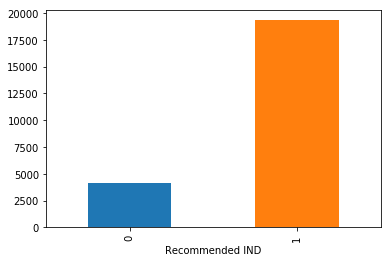

In [5]:
#Plot the result
groups = rev.groupby('Recommended IND').size()
groups.plot.bar()

#### Rating by Recommended IND

Now, I check the rating for the recommended and not recommended items.

In [6]:
#how many recommended and not recommended products have rating 1, 2, 3, 4, 5 
num=[1,2,3,4,5]
for i in num:
    count = yes.Rating[yes.Rating == i].count()
    print ("The number of recommended products with rating = " + str(i) + " is " + str(count))
print ('##################################################')    
for i in num:
    count = no.Rating[no.Rating == i].count()
    print ("The number of no recommended products with rating = " + str(i) + " is " + str(count))
    

The number of recommended products with rating = 1 is 16
The number of recommended products with rating = 2 is 94
The number of recommended products with rating = 3 is 1189
The number of recommended products with rating = 4 is 4909
The number of recommended products with rating = 5 is 13106
##################################################
The number of no recommended products with rating = 1 is 826
The number of no recommended products with rating = 2 is 1471
The number of no recommended products with rating = 3 is 1682
The number of no recommended products with rating = 4 is 168
The number of no recommended products with rating = 5 is 25


 Note that there are low rating (1 and 2) also for recommended products and high ratings (4 and 5) for not recommended items.
 So, I decide to check the review text for the recommended products but with rating 1.

In [7]:
print (yes["Review Text"][yes.Rating == 1])

2427     Beautiful jacket and i got lots of compliments...
2872     Very cute top. i went down a size because for ...
5570     I love this t-shirt because it has the combina...
6216     Love the movement of the blouse and how it fal...
7740     I loved the color and design until i tried it ...
7850     This is so close to perfect, but there's a sea...
9877     I loved the dress, but just not dressy enough ...
10517    I saw this dress in the catalog and had to hav...
13607    Such a great dress. fit is flattering. the sma...
16194    This is an extremely flattering dress. i could...
16428    Love this top! it's pretty, unique and well ma...
16995    Love the jacket! so versatile! would probably ...
18676    This is a cute dress, but not for me. 1. i thi...
20649                                                  NaN
22087    Love this top! but unfortunately i returned it...
22632    Just wanted to review so people know this hood...
Name: Review Text, dtype: object


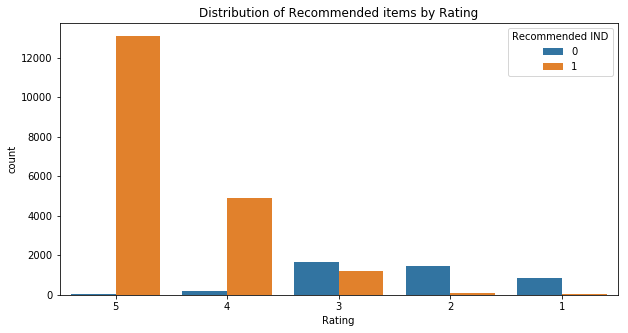

In [8]:
#Plot together the Recommended and not items by Rating 
plt.subplots(figsize=(10,5))
ax = sns.countplot(x = 'Rating', hue='Recommended IND', data = rev, order = rev['Rating'].value_counts().index)
plt.title('Distribution of Recommended items by Rating')
plt.show()

As expected, the recommended items have higher rating and vice versa. The rating 3 is the feature where there is the changing.
But, as said before, there is also few products recommended with a low rating and not recommended products with high rating.

This result could be due to the very personal clothing experience with the product: for example, in the case of recommended items with low rating it seems that the customers love the product but they have fit issue or product handling problem. 


##### Rating distribution

Text(0.5,1,'Distribution of rating')

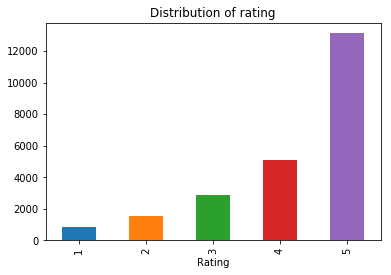

In [9]:
#Check the distribution of rating
groups = rev.groupby('Rating').size()
groups.plot.bar()
plt.title('Distribution of rating')

The major part of products have a very good rating: the reviews are very highly positive, with a score of five and four! 

###### Now, consider the Positive feedback Count

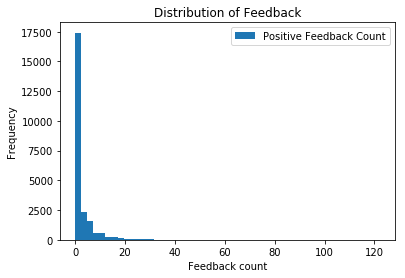

Text(0.5,1,'Density estimate of the Positive Feedback Count')

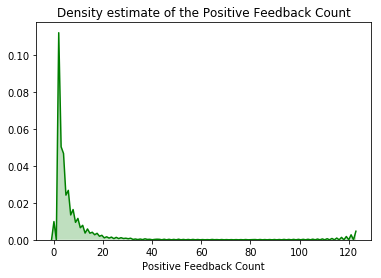

In [10]:
rev.plot(y='Positive Feedback Count', kind='hist', bins=50)
plt.xlabel('Feedback count')
plt.title('Distribution of Feedback')
plt.show()

sns.distplot(rev['Positive Feedback Count'], hist=False, color="g", kde_kws={"shade": True}).set_title('Density estimate of the Positive Feedback Count')

This result, with the number of positive feedback close to 0, it is quite surprising because it means that there are few customers that find the reviews very positive.

##### Positive Feedback Count Distribution by Rating

I analyse the number of positive feedback divided by rating.

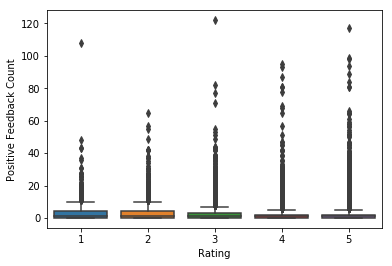

In [11]:
sns.boxplot(x='Rating', y='Positive Feedback Count', data=rev)

And now, in detail (only the first 10 most positive feedback count):

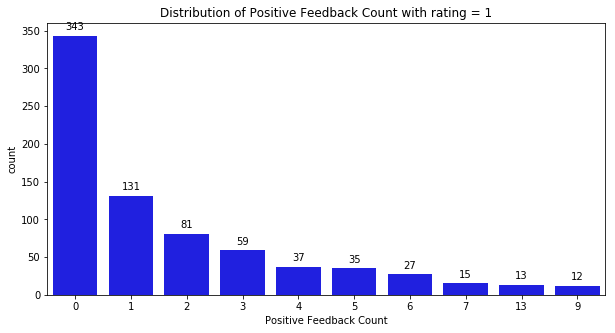

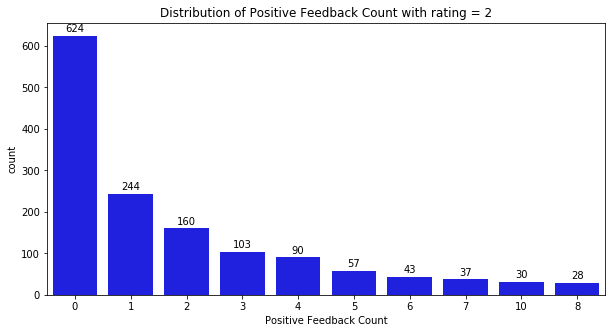

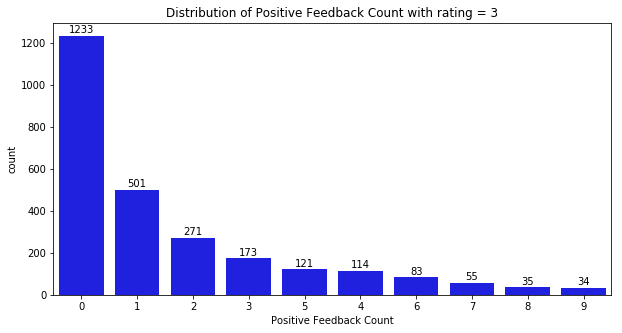

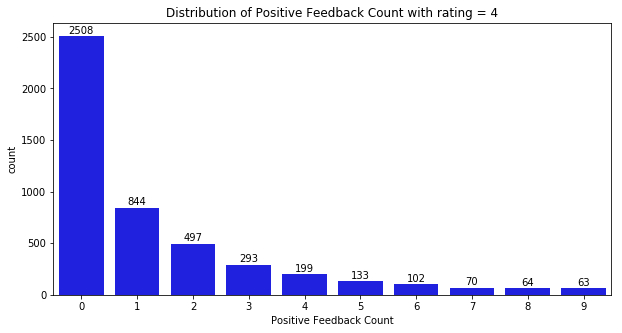

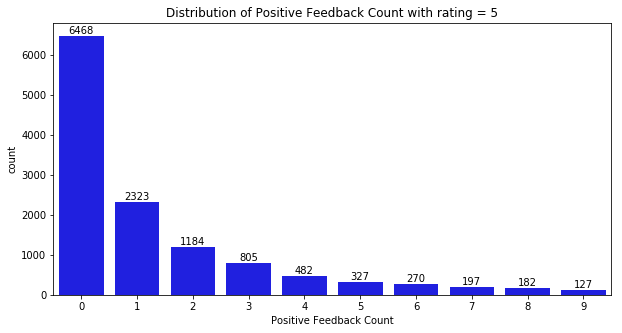

In [12]:
plt.subplots(figsize=(10,5))
data = rev[rev.Rating == 1]
ax = sns.countplot(x = 'Positive Feedback Count', data = data, color ='blue', order = data['Positive Feedback Count'].value_counts().head(10).index)
plt.title('Distribution of Positive Feedback Count with rating = 1')
x=data['Positive Feedback Count'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

plt.subplots(figsize=(10,5))
data = rev[rev.Rating == 2]
ax = sns.countplot(x = 'Positive Feedback Count', data = data, color ='blue', order = data['Positive Feedback Count'].value_counts().head(10).index)
plt.title('Distribution of Positive Feedback Count with rating = 2')
x=data['Positive Feedback Count'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

plt.subplots(figsize=(10,5))
data = rev[rev.Rating == 3]
ax = sns.countplot(x = 'Positive Feedback Count', data = data,color ='blue', order = data['Positive Feedback Count'].value_counts().head(10).index)
plt.title('Distribution of Positive Feedback Count with rating = 3')
x=data['Positive Feedback Count'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

plt.subplots(figsize=(10,5))
data = rev[rev.Rating == 4]
ax = sns.countplot(x = 'Positive Feedback Count', data = data,color ='blue', order = data['Positive Feedback Count'].value_counts().head(10).index)
plt.title('Distribution of Positive Feedback Count with rating = 4')
x=data['Positive Feedback Count'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

plt.subplots(figsize=(10,5))
data = rev[rev.Rating == 5]
ax = sns.countplot(x = 'Positive Feedback Count', data = data,color ='blue', order = data['Positive Feedback Count'].value_counts().head(10).index)
plt.title('Distribution of Positive Feedback Count with rating = 5')
x=data['Positive Feedback Count'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Here I confirm that most of the items don't have positive feedback (0) or very few one (1, 2 or 3). 

#### The positive feedback Count for recommended and not products

[]

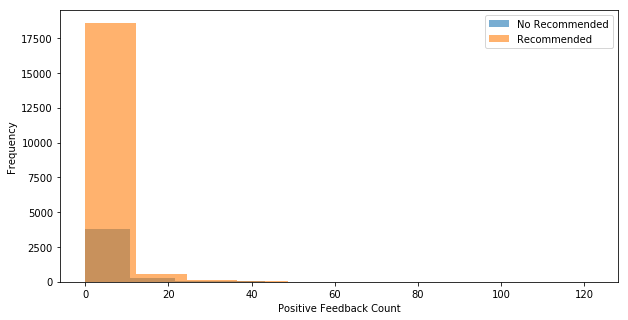

In [13]:
plt.subplots(figsize=(10,5))
rev.loc[rev['Recommended IND'] == 0, 'Positive Feedback Count' ].plot(kind='hist', alpha=0.6)
rev.loc[rev['Recommended IND'] == 1 , 'Positive Feedback Count'].plot(kind='hist', alpha=0.6)
plt.xlabel('Positive Feedback Count')
plt.grid(False)
plt.gca().legend(('No Recommended','Recommended'))
plt.plot()

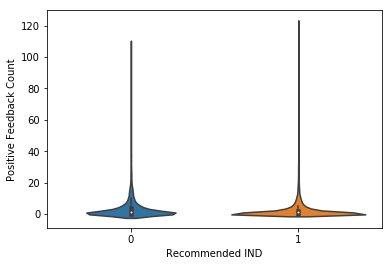

In [14]:
sns.violinplot(x='Recommended IND', y='Positive Feedback Count', data=rev)

All these plots confirm the few Positive Feedback Count.

#### Rating vs Positive Feedback Count divided by Recommended IND

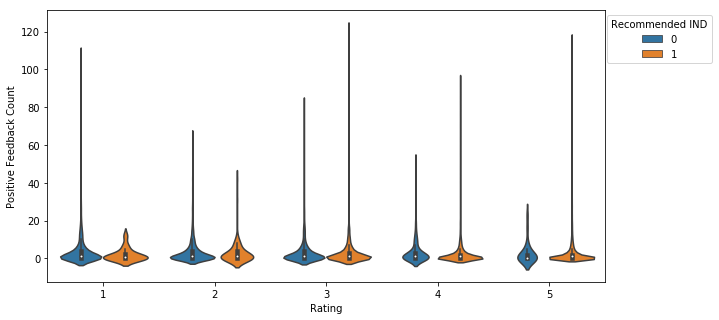

In [15]:
plt.subplots(figsize=(10,5))
sns.violinplot(x='Rating', y='Positive Feedback Count', hue='Recommended IND', data= rev).get_legend().set_bbox_to_anchor((1.2, 1.0))


#### Which are the 10 most  and less common recommended and not Clothing ID?

The Clothing ID most recommended and not: 

In [16]:
#Find the 10 most common recommended Clothing ID 
cloth_most_rec = yes['Clothing ID'].value_counts().head(10)
#print (cloth_most_rec)

#Find the 10 most common no recommended Clothing ID 
cloth_most_no_rec = no['Clothing ID'].value_counts().head(10)

print ("The 10 most common recommended Clothing ID are:\n"  + str(cloth_most_rec))
print ("##################################################")
print ("The 10 most common not recommended Clothing ID are:\n" + str(cloth_most_no_rec))      

The 10 most common recommended Clothing ID are:
1078    841
862     661
1094    621
1081    494
872     478
829     436
1110    403
895     341
868     325
850     294
Name: Clothing ID, dtype: int64
##################################################
The 10 most common not recommended Clothing ID are:
1078    183
862     145
1094    135
868     105
829      91
1081     88
1110     77
1095     68
872      67
867      66
Name: Clothing ID, dtype: int64


And the 10 Clothing ID less recommended and not:

In [17]:
#Find the 10 less recommended Clothing ID
cloth_less_rec = yes['Clothing ID'].value_counts().tail(10)

#Find the 10 less no recommended Clothing ID
cloth_less_no_rec = no['Clothing ID'].value_counts().tail(10)


print ("The 10 less recommended Clothing ID are: \n" + str(cloth_less_rec))
print ("#########################################")
print ("The 10 less not recommended Clothing ID are: \n" + str(cloth_less_no_rec))

The 10 less recommended Clothing ID are: 
680    1
648    1
600    1
568    1
488    1
344    1
328    1
312    1
264    1
0      1
Name: Clothing ID, dtype: int64
#########################################
The 10 less not recommended Clothing ID are: 
765     1
757     1
749     1
741     1
725     1
717     1
697     1
1106    1
677     1
118     1
Name: Clothing ID, dtype: int64


In [18]:
df1 = pd.DataFrame(cloth_most_rec)
df1.columns = ['Count']
df1.reindex = ['Clothing ID']
df1.index.name = 'Clothing ID'

df0 = pd.DataFrame(cloth_most_no_rec)
df0.columns = ['Count']
df0.reindex = ['Clothing ID']
df0.index.name = 'Clothing ID'

# Merge the two dataframes
together = pd.merge(df1, df0, on ='Clothing ID', suffixes=['_yes', '_no'], how='outer')


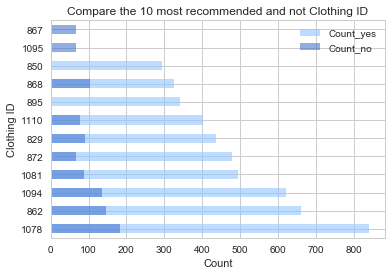

In [19]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
p1 = together['Count_yes'].plot(kind='barh', alpha=0.6, stacked=True, color='b', legend=True)
sns.set_color_codes("muted")
p2 = together['Count_no'].plot(kind='barh', alpha=0.6, stacked=True, color='b', legend=True)
plt.xlabel('Count')
plt.title('Compare the 10 most recommended and not Clothing ID')
plt.show()

#### Rating vs Age

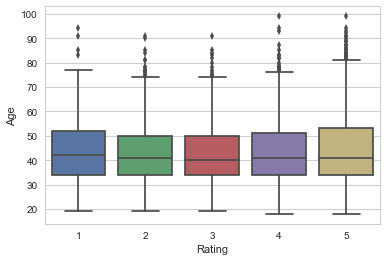

In [20]:
sns.boxplot(x='Rating', y='Age', data=rev)

#### Distribution of recommended and not items by Division Name, Department Name and Class Name

In this section, we plot the distribution of recommended and not products but divided by Division Name, Department Name and Class Name and the trend is confirmed. 

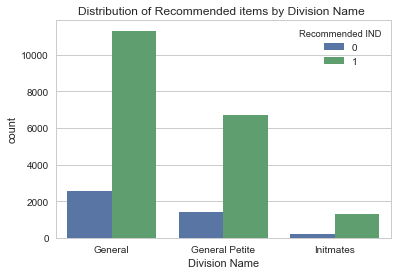

In [21]:
ax = sns.countplot(x = 'Division Name', hue='Recommended IND', data = rev, order = rev['Division Name'].value_counts().index)
plt.title('Distribution of Recommended items by Division Name ')
plt.show()

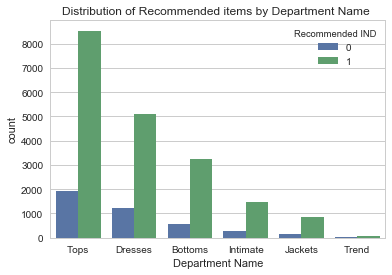

In [22]:
ax = sns.countplot(x = 'Department Name', hue='Recommended IND', data = rev, order = rev['Department Name'].value_counts().index)
plt.title('Distribution of Recommended items by Department Name ')
plt.show()

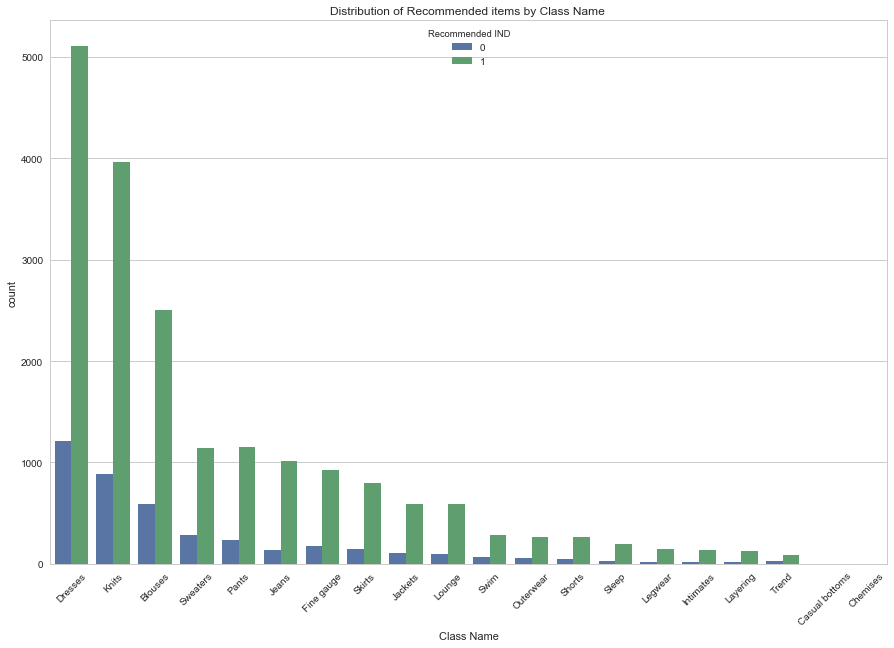

In [23]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=45)
ax = sns.countplot(x = 'Class Name', hue='Recommended IND', data = rev, order = rev['Class Name'].value_counts().index)
plt.title('Distribution of Recommended items by Class Name ')
plt.show()

#### How many reviews are there per Division Name, Department Name and Class Name?

We calculate the percentage and plot the distribution for the categories of Division Name, Department Name and Class Name.

In [24]:
#Calculate the percentage of Division Name

x=rev['Division Name'].value_counts()
y = rev['Division Name'].value_counts().sum()
perc_Division_Name = x.div(y, level='Division Name') * 100

print ("The percentage per Division Name is \n" + str(perc_Division_Name))

The percentage per Division Name is 
General           59.006476
General Petite    34.594410
Initmates          6.399114
Name: Division Name, dtype: float64


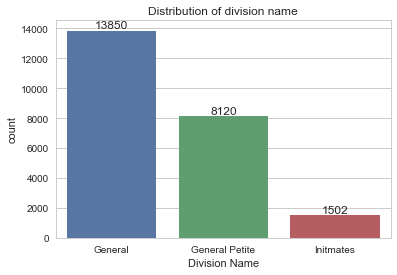

In [25]:
#Check the distribution of reviews per division name
ax = sns.countplot(x ='Division Name', data = rev, order = rev['Division Name'].value_counts().index)
plt.title('Distribution of division name')
x=rev['Division Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

General category has most reviews.

In [26]:
#Calculate the percentage of Department Name

x=rev['Department Name'].value_counts()
y = rev['Department Name'].value_counts().sum()
perc_Department_Name = x.div(y, level='Department Name') * 100

print ("The percentage per Department Name is \n" + str(perc_Department_Name))

The percentage per Department Name is 
Tops        44.597819
Dresses     26.921438
Bottoms     16.185242
Intimate     7.391786
Jackets      4.396728
Trend        0.506987
Name: Department Name, dtype: float64


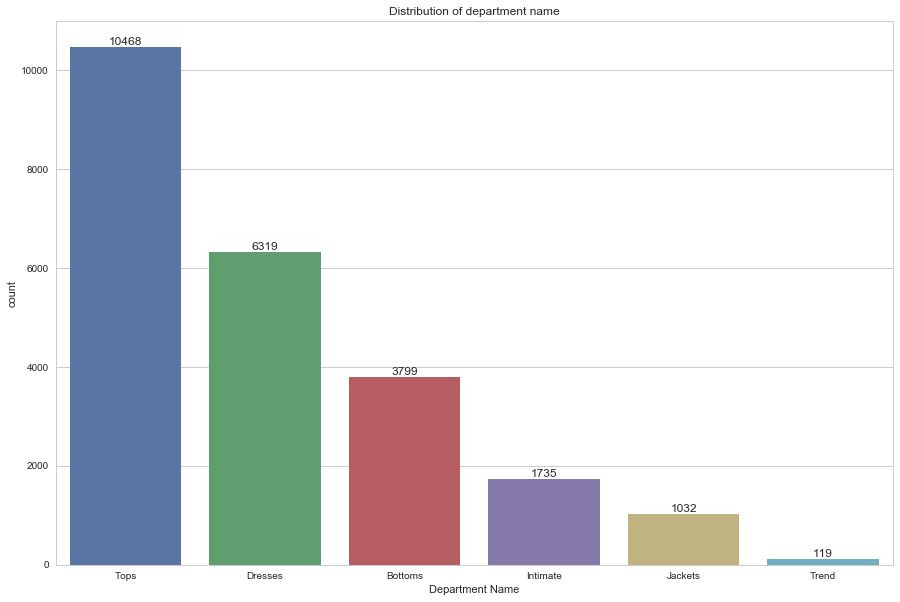

In [27]:
#Check the number of reviews per Department Name 
plt.subplots(figsize=(15,10))
ax = sns.countplot(x = 'Department Name', data = rev, order = rev['Department Name'].value_counts().index)
plt.title('Distribution of department name')
x=rev['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Tops and Dresses are the most commonly reviewed products.

In [28]:
#Calculate the percentage of Class Name

x=rev['Class Name'].value_counts()
y = rev['Class Name'].value_counts().sum()
perc_Class_Name = x.div(y, level='Class Name') * 100

print ("The percentage per Class Name is \n" + str(perc_Class_Name))

The percentage per Class Name is 
Dresses           26.921438
Knits             20.633095
Blouses           13.194444
Sweaters           6.083845
Pants              5.913429
Jeans              4.886673
Fine gauge         4.686435
Skirts             4.026074
Jackets            2.999318
Lounge             2.943933
Swim               1.491138
Outerwear          1.397410
Shorts             1.350545
Sleep              0.971370
Legwear            0.702965
Intimates          0.656101
Layering           0.622018
Trend              0.506987
Casual bottoms     0.008521
Chemises           0.004260
Name: Class Name, dtype: float64


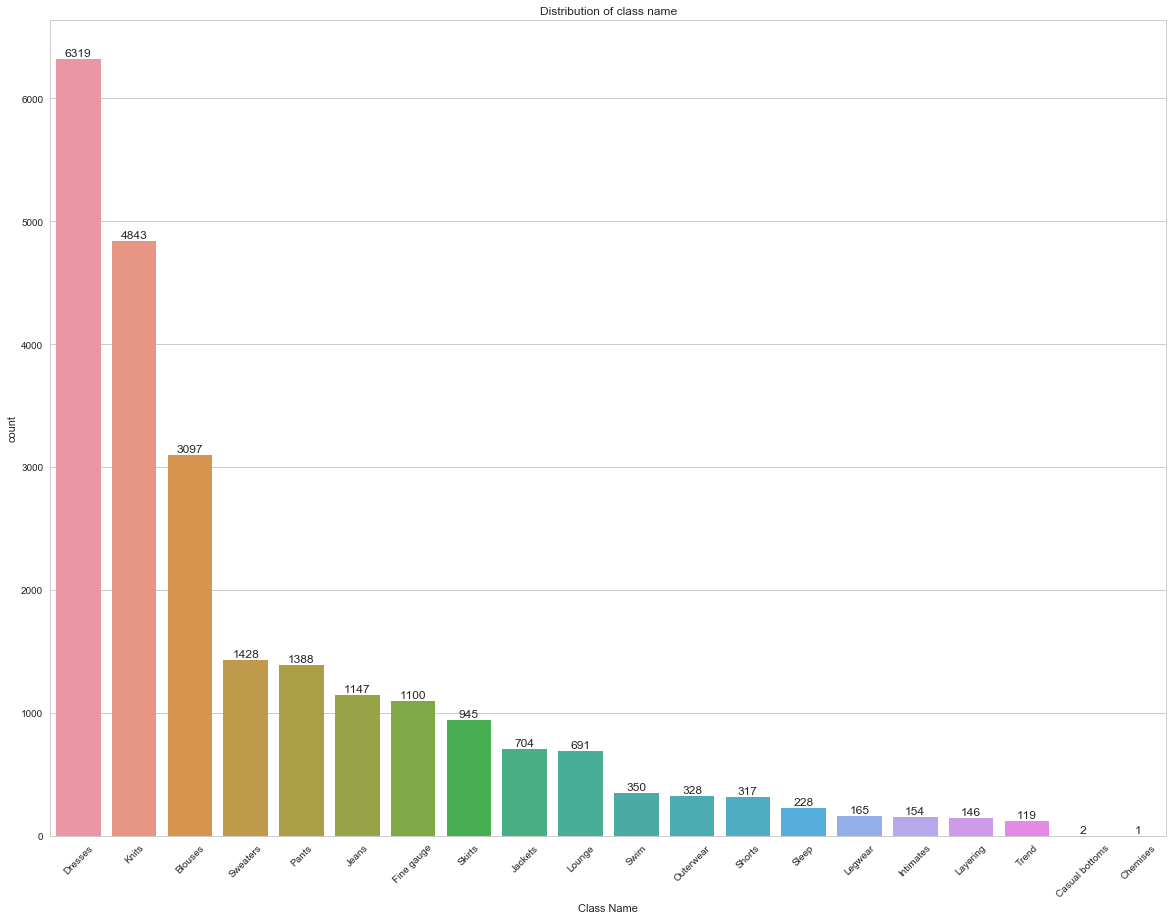

In [29]:
#Check the distribution of reviews per class name
plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
ax = sns.countplot(x = 'Class Name', data = rev, order = rev['Class Name'].value_counts().index)
plt.title('Distribution of class name')
x=rev['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

The most popular clothing types are: dresses, knits and blouses.

#### Rating by Department Name and Division Name

I study the distribution of rating divided by Department Name and Division Name: as expected, the rating 5 and 4 have always more items. This result is consistent with the overall distribution of Rating.


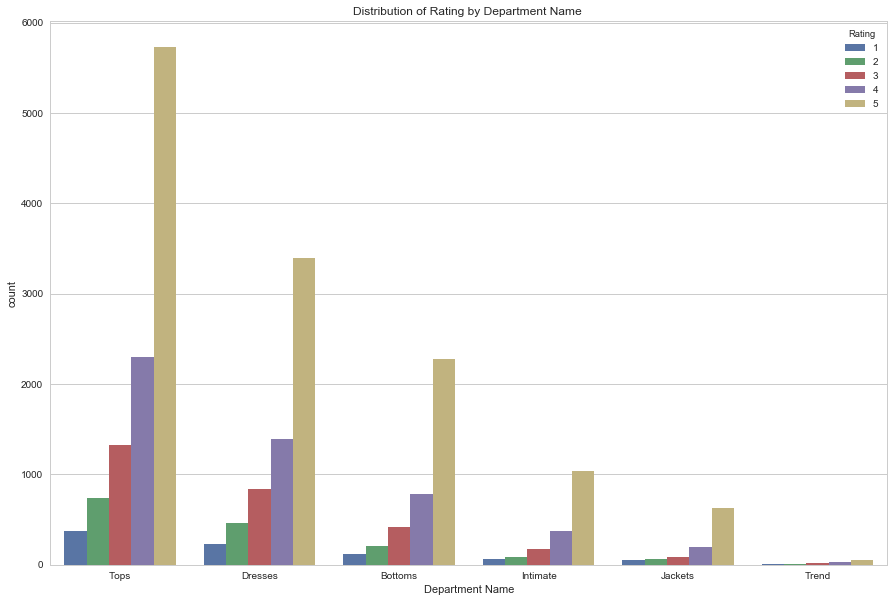

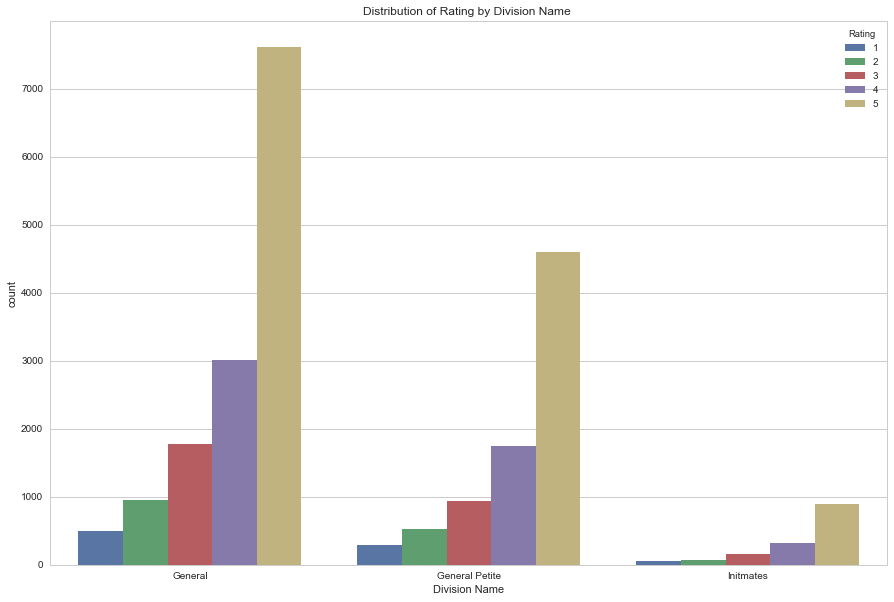

In [30]:
plt.subplots(figsize=(15,10))
ax = sns.countplot(x = 'Department Name', hue='Rating', data = rev, order = rev['Department Name'].value_counts().index)
plt.title('Distribution of Rating by Department Name ')
plt.show()

plt.subplots(figsize=(15,10))
ax = sns.countplot(x = 'Division Name', hue='Rating', data = rev, order = rev['Division Name'].value_counts().index)
plt.title('Distribution of Rating by Division Name ')
plt.show()

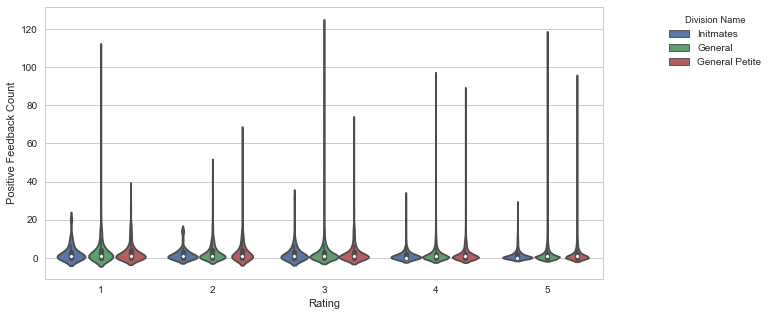

In [31]:
plt.subplots(figsize=(10,5))
sns.violinplot(x='Rating', y='Positive Feedback Count', hue='Division Name', data= rev).get_legend().set_bbox_to_anchor((1.3, 1.0))

##### Department Name, Division Name and Class Name where each age group tends to shop the most: I divided the data in 3 subgroups

In this section, I decided to divided the age in three subgroups and see the number of reviews per Department Name, Division Name and Class Name. 
These subgroups are: 
- Age < 34, 
- 34 <= Age <= 52 and 
- Age > 52.

In [32]:
x1 = rev.loc[rev.Age < 34]
x1['group_Age'] = 'less than 34'

x2 = rev.loc[(rev.Age >= 34) & (rev.Age <= 52)]
x2['group_Age'] = 'between 34 and 52'

x3 = rev.loc[rev.Age > 52]
x3['group_Age'] = 'more than 52'

age_count1 = (x1['Department Name'].value_counts()/x1['group_Age'].count())*100
age_count2 = (x2['Department Name'].value_counts()/x2['group_Age'].count())*100
age_count3 = (x3['Department Name'].value_counts()/x3['group_Age'].count())*100


print ('The percentage of Department Name for reviewers age less than 34: \n' + str(age_count1))
print ('The percentage of Department Name for reviewers age between 34 and 52: \n' + str(age_count2))
print ('The percentage of Department Name for reviewer age more than 52: \n' + str(age_count3))

age_count1 = (x1['Division Name'].value_counts()/x1['group_Age'].count())*100
age_count2 = (x2['Division Name'].value_counts()/x2['group_Age'].count())*100
age_count3 = (x3['Division Name'].value_counts()/x3['group_Age'].count())*100


print ('The percentage of Division Name for reviewers age less than 34: \n' + str(age_count1))
print ('The percentage of Division Name for reviewers age between 34 and 52: \n' + str(age_count2))
print ('The percentage of Division Name for reviewer age more than 52: \n' + str(age_count3))

age_count1 = (x1['Class Name'].value_counts()/x1['group_Age'].count())*100
age_count2 = (x2['Class Name'].value_counts()/x2['group_Age'].count())*100
age_count3 = (x3['Class Name'].value_counts()/x3['group_Age'].count())*100


print ('The percentage of Class Name for reviewers age less than 34: \n' + str(age_count1.head(10)))
print ('The percentage of Class Name for reviewers age between 34 and 52: \n' + str(age_count2.head(10)))
print ('The percentage of Class Name for reviewer age more than 52: \n' + str(age_count3.head(10)))

The percentage of Department Name for reviewers age less than 34: 
Tops        40.110203
Dresses     30.077902
Bottoms     15.523466
Intimate     9.386282
Jackets      4.503135
Trend        0.342010
Name: Department Name, dtype: float64
The percentage of Department Name for reviewers age between 34 and 52: 
Tops        44.226237
Dresses     27.117046
Bottoms     16.692852
Intimate     7.250589
Jackets      4.084839
Trend        0.549882
Name: Department Name, dtype: float64
The percentage of Department Name for reviewer age more than 52: 
Tops        49.645003
Dresses     23.375205
Bottoms     15.601675
Intimate     5.789186
Jackets      5.006372
Trend        0.564355
Name: Department Name, dtype: float64
The percentage of Division Name for reviewers age less than 34: 
General           58.274748
General Petite    33.193996
Initmates          8.474254
Name: Division Name, dtype: float64
The percentage of Division Name for reviewers age between 34 and 52: 
General           58.735271
Ge

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

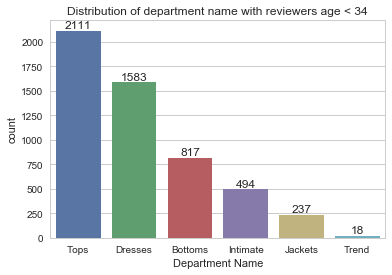

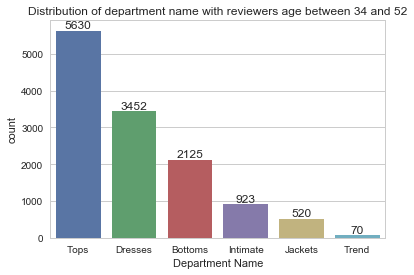

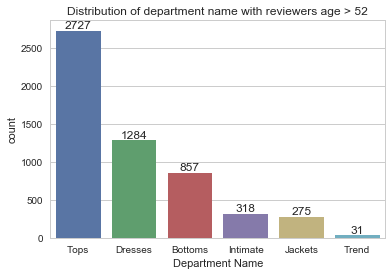

In [33]:
#Check the number of reviews per Department Name with reviewers age < 34 
#plt.subplots(figsize=(15,10))

data = rev[rev.Age < 34]
ax = sns.countplot(x = 'Department Name', data = data, order = data['Department Name'].value_counts().index)
plt.title('Distribution of department name with reviewers age < 34')
x=data['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the number of reviews per Department Name with reviewers age between 34 and 52 
#plt.subplots(figsize=(15,10))

data = rev[(rev.Age >= 34) & (rev.Age <= 52)]
ax = sns.countplot(x = 'Department Name', data = data, order = data['Department Name'].value_counts().index)
plt.title('Distribution of department name with reviewers age between 34 and 52')
x=data['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the number of reviews per Department Name with reviewers age > 52 
#plt.subplots(figsize=(15,10))

data = rev[rev.Age > 52 ]
ax = sns.countplot(x = 'Department Name', data = data, order = data['Department Name'].value_counts().index)
plt.title('Distribution of department name with reviewers age > 52')
x=data['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()


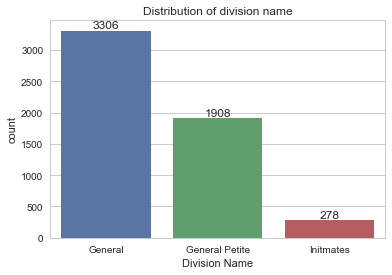

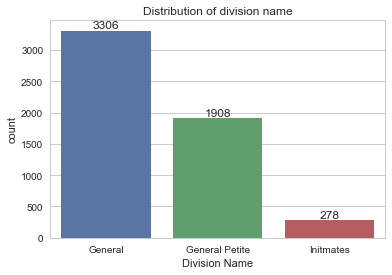

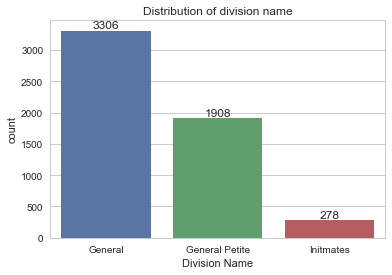

In [34]:
#Check the distribution of reviews per division name with reviewers age < 34
ax = sns.countplot(x ='Division Name', data = data, order = data['Division Name'].value_counts().index)
plt.title('Distribution of division name')
x=data['Division Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the distribution of reviews per division name with reviewers age between 34 and 52
ax = sns.countplot(x ='Division Name', data = data, order = data['Division Name'].value_counts().index)
plt.title('Distribution of division name')
x=data['Division Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#Check the distribution of reviews per division name with reviewers age > 52
ax = sns.countplot(x ='Division Name', data = data, order = data['Division Name'].value_counts().index)
plt.title('Distribution of division name')
x=data['Division Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

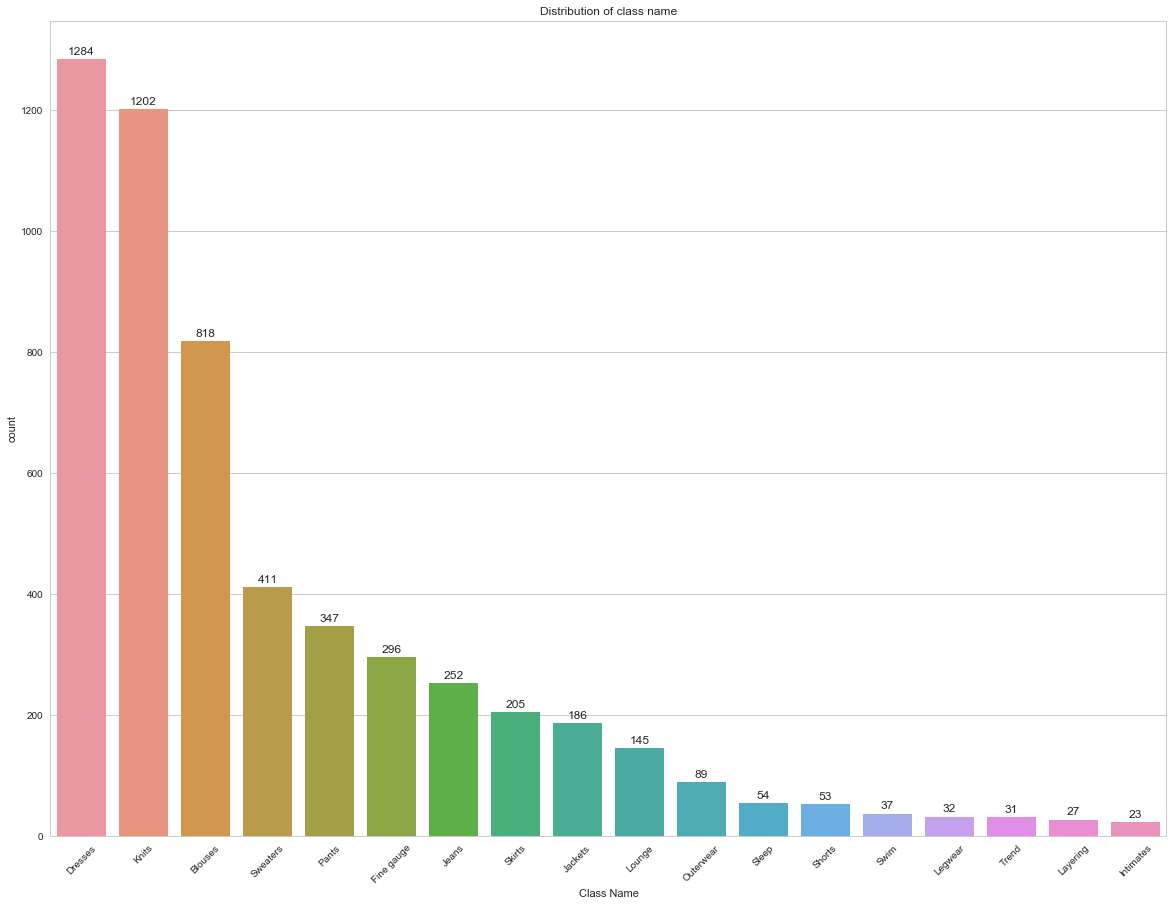

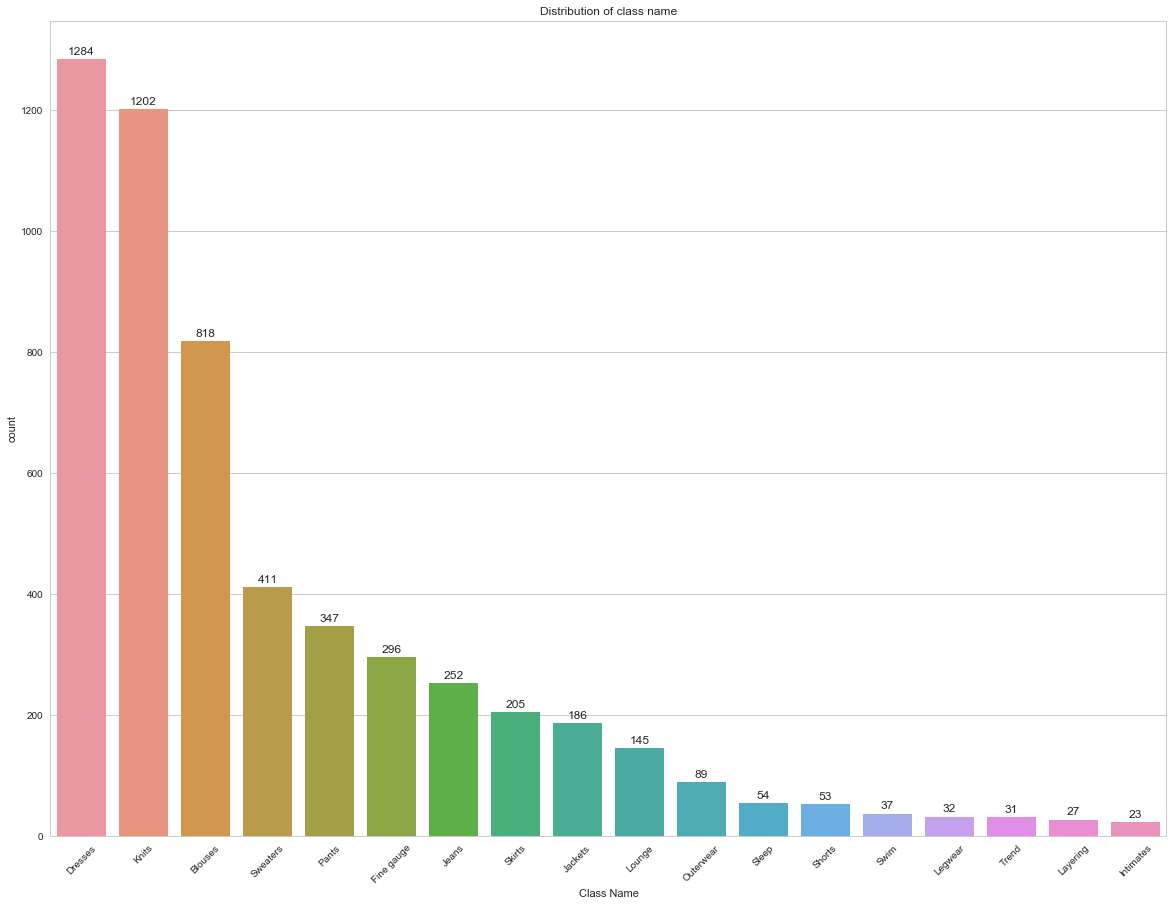

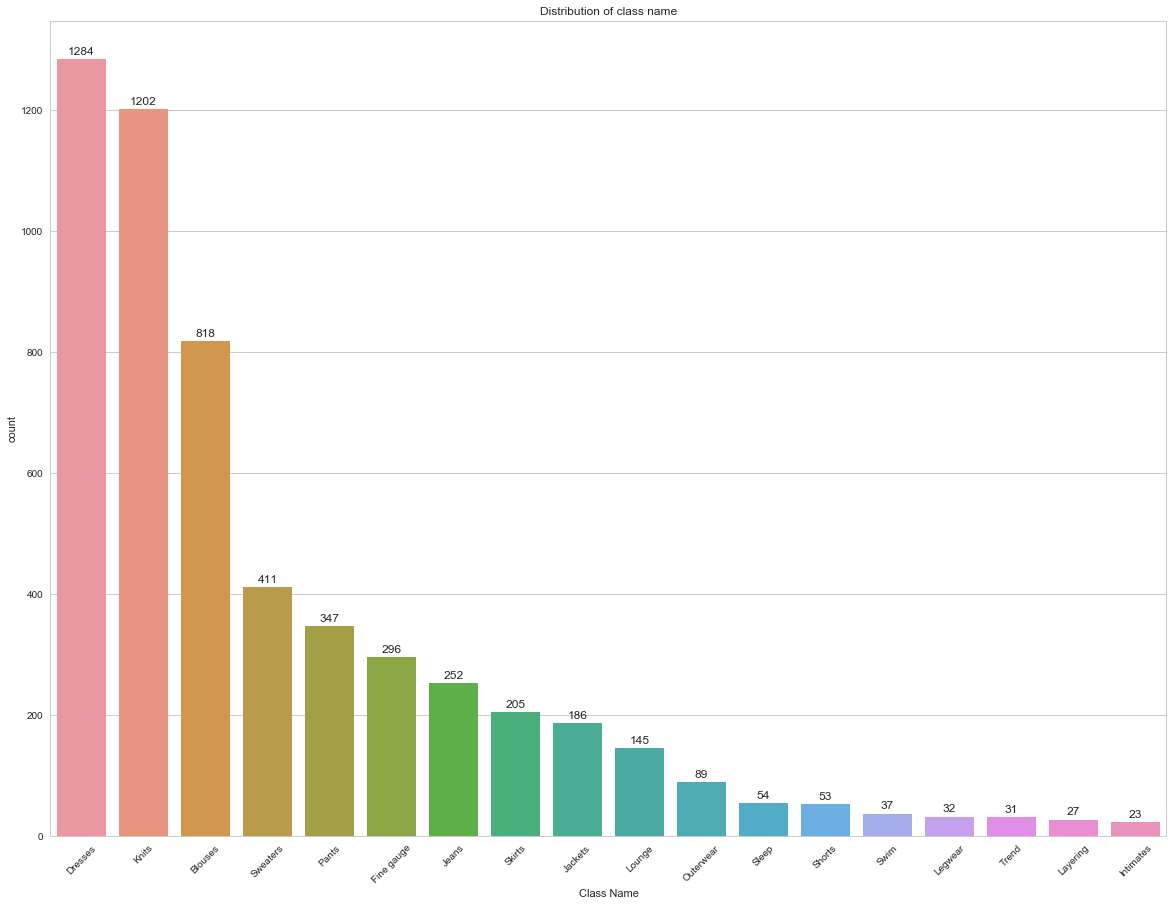

In [35]:
#Check the distribution of reviews per class name with reviewers age < 34
plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
ax = sns.countplot(x = 'Class Name', data = data, order = data['Class Name'].value_counts().index)
plt.title('Distribution of class name')
x=data['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()


#Check the distribution of reviews per class name with reviewers age between 34 and 52
plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
ax = sns.countplot(x = 'Class Name', data = data, order = data['Class Name'].value_counts().index)
plt.title('Distribution of class name')
x=data['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()


#Check the distribution of reviews per class name with reviewers age > 52
plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
ax = sns.countplot(x = 'Class Name', data = data, order = data['Class Name'].value_counts().index)
plt.title('Distribution of class name')
x=data['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Each subgroup presents the same most commonly reviewed products: it seems that the age doesn't influence the distribution of reviews.

### Correlations:

#### Correlation between age and positive feedback count.

I start to plot the correlation between age and positive feedback count received: there seems to be a slight correlation.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


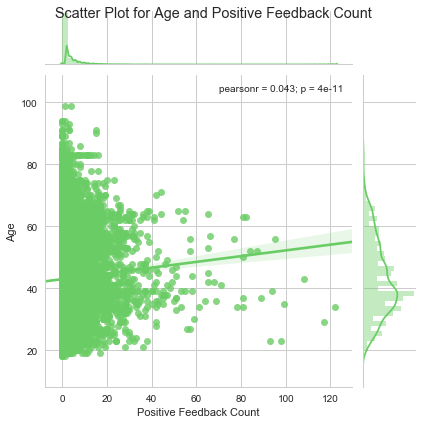

In [36]:
sns.jointplot(x='Positive Feedback Count', y='Age', data= rev, kind='reg', color='g')
plt.suptitle('Scatter Plot for Age and Positive Feedback Count')
plt.show()

We calculate the count and mean group by Clothing ID of Rating, Recommended IND, Age and Positive Feedback Count. 

In [37]:
stat = (rev.groupby('Clothing ID')[["Rating","Recommended IND", "Age", "Positive Feedback Count"]].aggregate(['count','mean']))
stat.columns = ["Rating_Count","Rating_Mean","Recommended_Count", "Recommended_Mean","Age_Count","Age_Mean", "Positive_Feedback_count", "Positive_Feedback_mean"]

#### Correlation between Recommended Mean and Rating Mean group by Clothing ID.

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


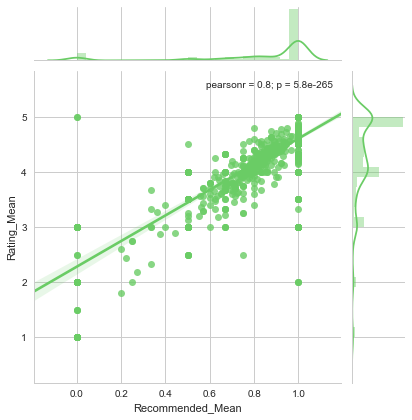

In [40]:
sns.jointplot(x="Recommended_Mean", y="Rating_Mean", data= stat, kind="reg", color="g")

There is a strong positive correlation of 0.8 between rating and recommended IND mean.

#### Correlation Matrix.

This matrix investigates if there is trend between average rating and number of reviews by product.

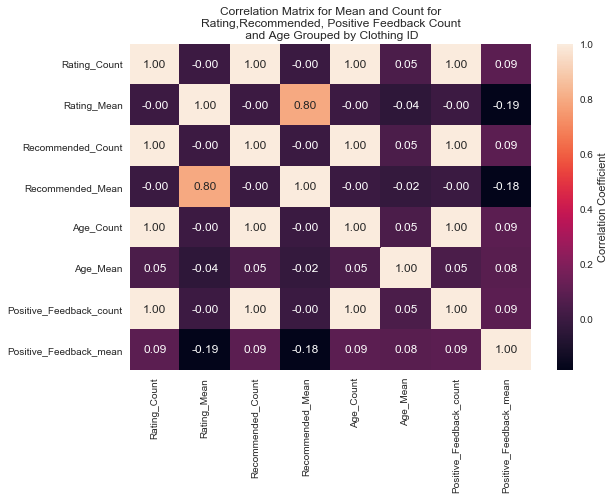

In [39]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(stat.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for Mean and Count for\nRating,Recommended, Positive Feedback Count\n and Age Grouped by Clothing ID")
plt.show()

From the heatmap, we can understand that there isn't correlation between count and average value. But, we can see also that there is a strong positive correlation of .80 between rating and recommended IND mean as the plot above shown.